<a href="https://colab.research.google.com/github/JunhOpportunity/AI_lab/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using cuda device


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


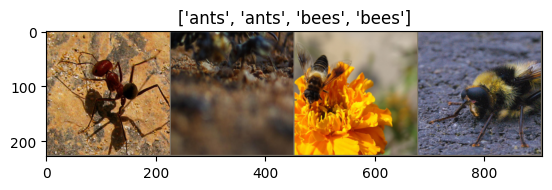

Epoch 0/24
----------
train Loss: 0.5567 Acc: 0.7295
val Loss: 0.3609 Acc: 0.8889

Epoch 1/24
----------
train Loss: 0.5966 Acc: 0.7910
val Loss: 0.3678 Acc: 0.8627

Epoch 2/24
----------
train Loss: 0.4714 Acc: 0.8320
val Loss: 0.3257 Acc: 0.8889

Epoch 3/24
----------
train Loss: 0.4594 Acc: 0.8033
val Loss: 0.6789 Acc: 0.8105

Epoch 4/24
----------
train Loss: 0.5825 Acc: 0.8033
val Loss: 0.6748 Acc: 0.7778

Epoch 5/24
----------
train Loss: 0.4502 Acc: 0.8402
val Loss: 0.2615 Acc: 0.9281

Epoch 6/24
----------
train Loss: 0.6402 Acc: 0.7828
val Loss: 1.1457 Acc: 0.7124

Epoch 7/24
----------
train Loss: 0.5663 Acc: 0.8115
val Loss: 0.3596 Acc: 0.9020

Epoch 8/24
----------
train Loss: 0.4510 Acc: 0.8279
val Loss: 0.3073 Acc: 0.8954

Epoch 9/24
----------
train Loss: 0.4555 Acc: 0.8279
val Loss: 0.2418 Acc: 0.9216

Epoch 10/24
----------
train Loss: 0.4030 Acc: 0.8525
val Loss: 0.2268 Acc: 0.9150

Epoch 11/24
----------
train Loss: 0.4034 Acc: 0.8402
val Loss: 0.2236 Acc: 0.9085

Ep

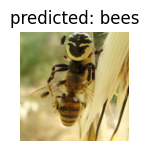

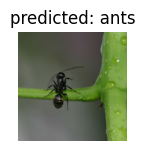

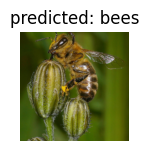

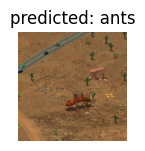

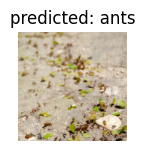

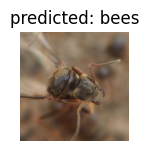

Epoch 0/24
----------
train Loss: 0.5758 Acc: 0.6885
val Loss: 0.2380 Acc: 0.9085

Epoch 1/24
----------
train Loss: 0.5489 Acc: 0.7459
val Loss: 0.2923 Acc: 0.8693

Epoch 2/24
----------
train Loss: 0.4945 Acc: 0.8156
val Loss: 0.1626 Acc: 0.9542

Epoch 3/24
----------
train Loss: 0.5162 Acc: 0.7582
val Loss: 0.1707 Acc: 0.9412

Epoch 4/24
----------
train Loss: 0.4320 Acc: 0.8156
val Loss: 0.1889 Acc: 0.9477

Epoch 5/24
----------
train Loss: 0.5058 Acc: 0.8115
val Loss: 0.2374 Acc: 0.9085

Epoch 6/24
----------
train Loss: 0.4039 Acc: 0.8279
val Loss: 0.1509 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.2741 Acc: 0.8811
val Loss: 0.1714 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3352 Acc: 0.8607
val Loss: 0.1644 Acc: 0.9608

Epoch 9/24
----------
train Loss: 0.2654 Acc: 0.8770
val Loss: 0.1620 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.3034 Acc: 0.8525
val Loss: 0.1591 Acc: 0.9673

Epoch 11/24
----------
train Loss: 0.3590 Acc: 0.8689
val Loss: 0.1638 Acc: 0.9412

Ep

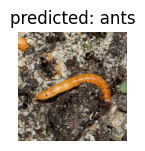

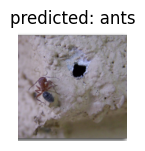

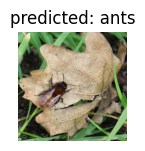

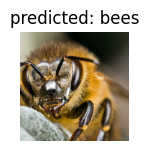

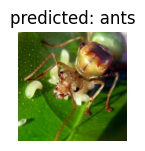

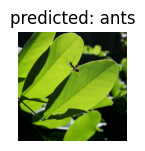

In [10]:
# License: BSD
# Author: Sasank Chilamkurthy
import zipfile
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

# 압축 파일 경로와 풀 경로 지정
zip_path = '/content/hymenoptera_data.zip'
extract_path = 'output_folder'

# 폴더가 없으면 생성
os.makedirs(extract_path, exist_ok=True)

# ZIP 파일 열기 및 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load DATA
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'output_folder/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")


def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model


def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

visualize_model(model_ft)

model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

visualize_model(model_conv)

plt.ioff()
plt.show()


Using cuda device


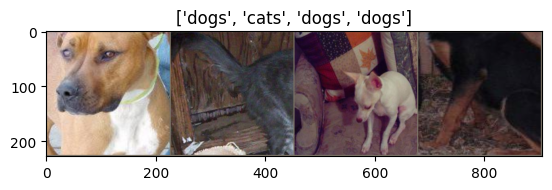

Epoch 0/24
----------
train Loss: 0.4872 Acc: 0.7904
val Loss: 0.3876 Acc: 0.8650

Epoch 1/24
----------
train Loss: 0.5580 Acc: 0.7705
val Loss: 0.1723 Acc: 0.9450

Epoch 2/24
----------
train Loss: 0.5373 Acc: 0.7834
val Loss: 0.1658 Acc: 0.9500

Epoch 3/24
----------
train Loss: 0.5249 Acc: 0.7794
val Loss: 0.1693 Acc: 0.9750

Epoch 4/24
----------
train Loss: 0.4454 Acc: 0.8184
val Loss: 0.1809 Acc: 0.9300

Epoch 5/24
----------
train Loss: 0.4148 Acc: 0.8194
val Loss: 0.1478 Acc: 0.9700

Epoch 6/24
----------
train Loss: 0.4230 Acc: 0.8273
val Loss: 0.1442 Acc: 0.9550

Epoch 7/24
----------
train Loss: 0.3010 Acc: 0.8743
val Loss: 0.1129 Acc: 0.9600

Epoch 8/24
----------
train Loss: 0.2196 Acc: 0.9102
val Loss: 0.1404 Acc: 0.9550

Epoch 9/24
----------
train Loss: 0.2498 Acc: 0.9002
val Loss: 0.0979 Acc: 0.9650

Epoch 10/24
----------
train Loss: 0.2503 Acc: 0.8932
val Loss: 0.0999 Acc: 0.9700

Epoch 11/24
----------
train Loss: 0.2171 Acc: 0.9172
val Loss: 0.0979 Acc: 0.9800

Ep

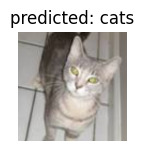

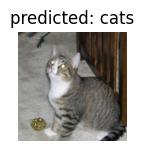

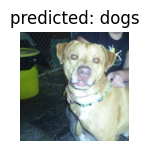

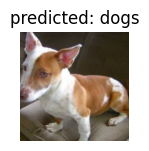

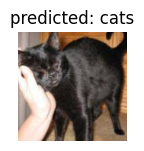

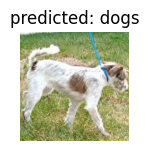

Epoch 0/24
----------
train Loss: 0.4264 Acc: 0.7994
val Loss: 0.1263 Acc: 0.9650

Epoch 1/24
----------
train Loss: 0.5039 Acc: 0.8074
val Loss: 0.3076 Acc: 0.9050

Epoch 2/24
----------
train Loss: 0.5394 Acc: 0.7984
val Loss: 0.1098 Acc: 0.9700

Epoch 3/24
----------
train Loss: 0.4226 Acc: 0.8273
val Loss: 0.1069 Acc: 0.9800

Epoch 4/24
----------
train Loss: 0.4566 Acc: 0.8164
val Loss: 0.1078 Acc: 0.9800

Epoch 5/24
----------
train Loss: 0.4253 Acc: 0.8204
val Loss: 0.2029 Acc: 0.9400

Epoch 6/24
----------
train Loss: 0.5140 Acc: 0.7944
val Loss: 0.1286 Acc: 0.9700

Epoch 7/24
----------
train Loss: 0.4020 Acc: 0.8293
val Loss: 0.1479 Acc: 0.9650

Epoch 8/24
----------
train Loss: 0.3671 Acc: 0.8473
val Loss: 0.1254 Acc: 0.9750

Epoch 9/24
----------
train Loss: 0.3539 Acc: 0.8483
val Loss: 0.1433 Acc: 0.9700

Epoch 10/24
----------
train Loss: 0.3106 Acc: 0.8733
val Loss: 0.1262 Acc: 0.9750

Epoch 11/24
----------
train Loss: 0.3622 Acc: 0.8393
val Loss: 0.1228 Acc: 0.9700

Ep

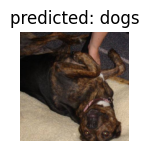

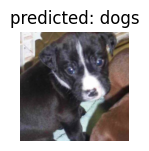

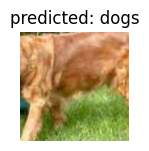

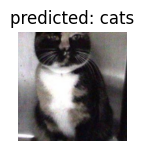

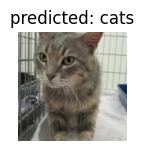

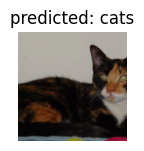

In [8]:
# License: BSD
# Author: Sasank Chilamkurthy
import zipfile
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

# 압축 파일 경로와 풀 경로 지정
zip_path = '/content/sample_computer_vision.zip'
extract_path = 'output_folder'

# 폴더가 없으면 생성
os.makedirs(extract_path, exist_ok=True)

# ZIP 파일 열기 및 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load DATA
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'output_folder/sample_computer_vision'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")


def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model


def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

visualize_model(model_ft)

model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

visualize_model(model_conv)

plt.ioff()
plt.show()

def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

visualize_model_predictions(
    model_conv,
    img_path='content/sample_computer_vision/val/cats/cat.4001.jpg'
)

plt.ioff()
plt.show()